# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine


from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download("punkt_tab")

from nltk.corpus import stopwords
from IPython.display import Image



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
#Choisir une décénie
DECADE = '1920'

#Défnir le chemin
data_path = "../../data/txt/"
txt_path = '../../data/txt'

#charger tous les fichiers de la décénnie et en créer une liste de textes
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

[('ANVERS', 4293), ('PARIS', 3710), ('FRANCE', 2597), ('SOCIÉTÉ', 2586), ('COURANT', 2532), ('LEURS', 2500), ('HOMME', 2454), ('VIS', 2392), ('CENT', 2391), ('GUERRE', 2360), ('MARCHÉ', 2265), ('GARE', 2156), ('GÉNÉRAL', 2150), ('GOUVERNEMENT', 2132), ('PREMIÈRE', 2048), ('LONDRES', 2047), ('DEMI', 2027), ('LOUISE', 2001), ('PLACES', 1991), ('BOURSE', 1969), ('BAS', 1964), ('SERVICE', 1955), ('PRÉSENTER', 1949), ('ART', 1931), ('MARS', 1914), ('ANGLAIS', 1887), ('BONNES', 1876), ('LIÈGE', 1858), ('POINT', 1853), ('MINISTRE', 1844), ('SEUL', 1841), ('AVRIL', 1829), ('GAGES', 1822), ('PRÉSIDENT', 1821), ('DEVANT', 1782), ('PETITE', 1766), ('BOULEVARD', 1765), ('LOI', 1764), ('FOIS', 1761), ('ROYALE', 1747), ('FORT', 1728), ('OUVRIER', 1717), ('RÉFÉRENCES', 1697), ('CONGO', 1686), ('CONSEIL', 1678), ('DEMANDÉ', 1666), ('FIN', 1664), ('TOUJOURS', 1660), ('CHÊNE', 1657), ('VIE', 1649), ('BELGES', 1644), ('MÉNAGE', 1642), ('IXELLES', 1639), ('UNION', 1633), ('RENTIER', 1624), ('ANNÉE', 1606)

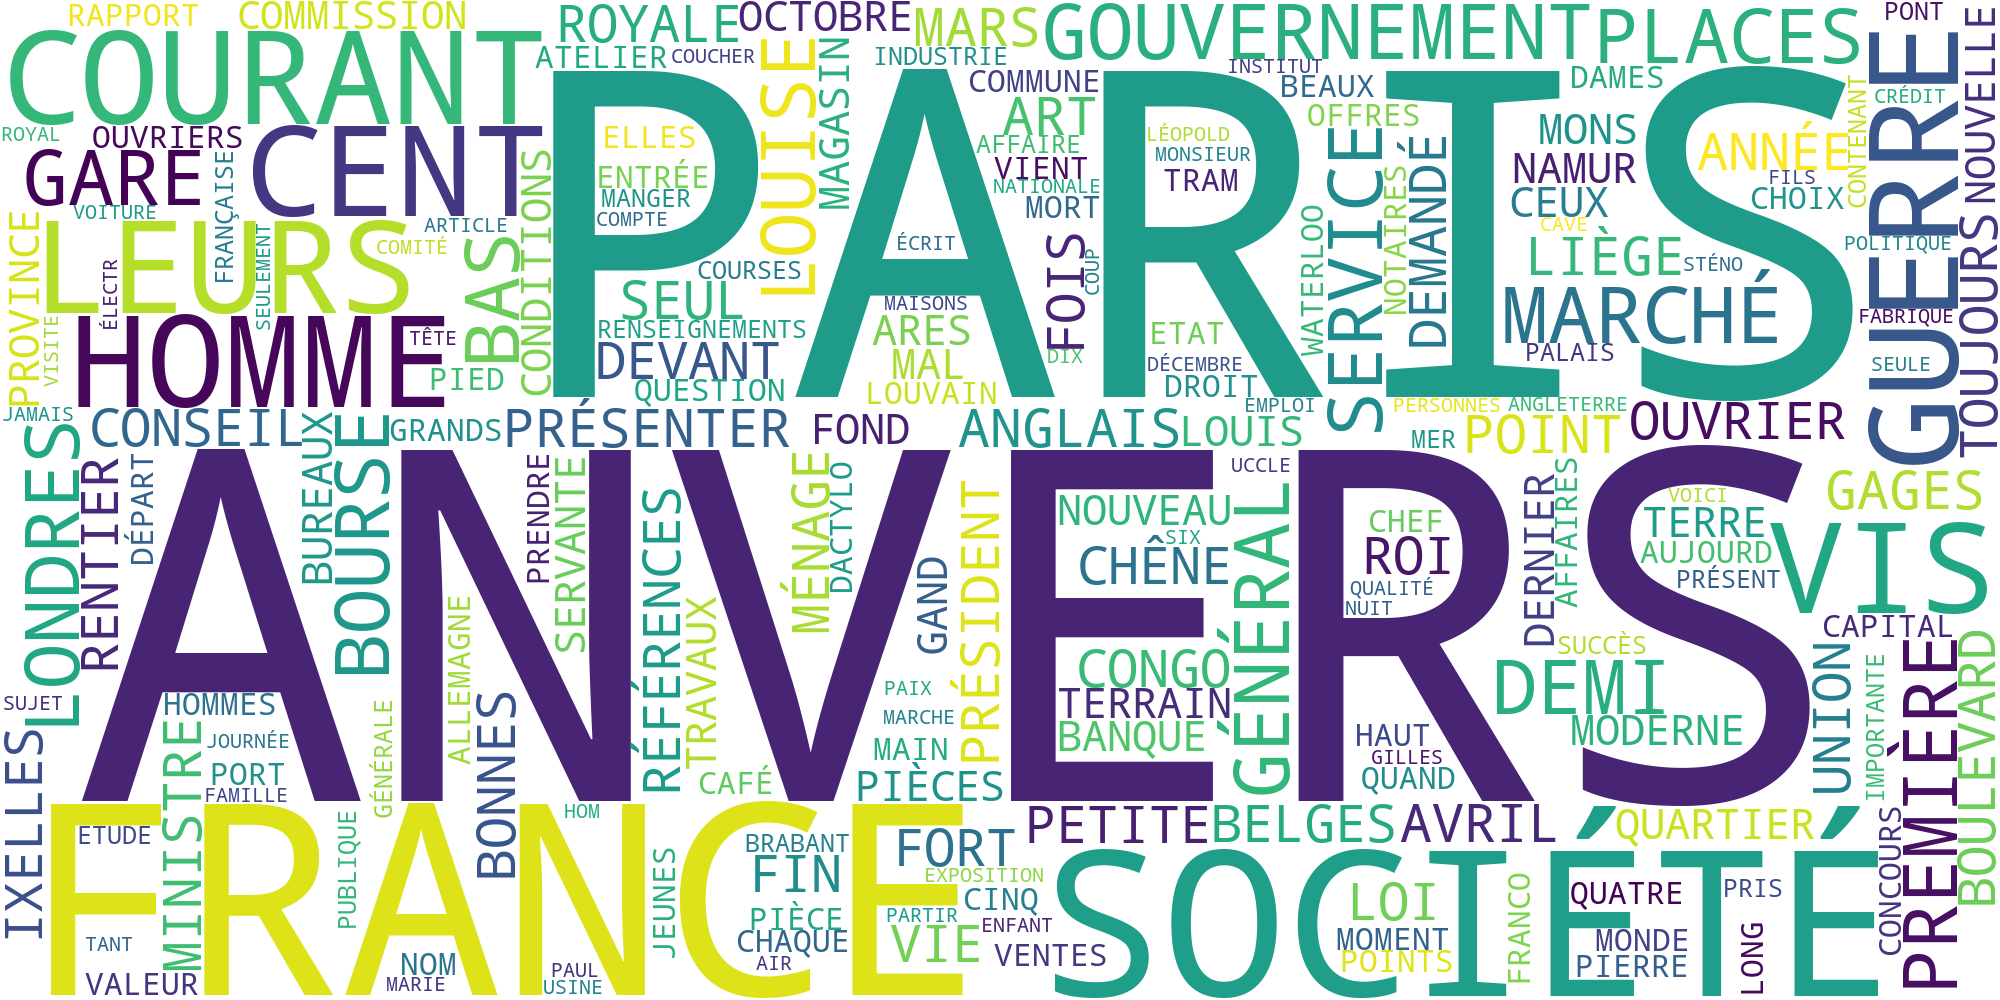

In [ ]:










# Stocker le contenu de ces fichiers dans une liste
content_list = []
for f in files:
    with open(os.path.join(txt_path, f), 'r', encoding='utf-8') as file:
        content_list.append(file.read())


# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{DECADE}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

# Stocker le contenu complet de la décennie dans un fichier
decade_file = os.path.join(temp_path, f"{DECADE}.txt")
with open(decade_file, "w", encoding="utf-8") as f:
    f.write(" ".join(texts))



# Stopwords décennie 1920
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "rue", "prix", "maison", 
       "an", "agence", "louer","très", "vendre", "bon", "heure", "place", "demande", "ecr", 
       "francs", "grand", "midi", "état", "vend", "belle", "ruo", "avenue", "brux", "nord",
       "fille", "gaz", "bonne", "adr", "vente",  "etc", "neuf", "bon", "libre", "mod", 
       "jours", "mois", "salle", "chambre", "eau", "app", "dés", "près", "grand", "grande", 
       "un", "une", "tél", "occasion", "matin", "soir", "beau", "on", "auto", "tout", "toute",
       "bail", "avant", "après", "jeune", "vieux", "disp", "belge", "belgique", "cuis", "villa",
       "cour", "notaire", "cours", "bel","pers", "bureau", "quart", "pays", "suite", "cap", "peu", 
       "situation", "garage", "mai", "gros", "rossel", "ros", "chez", "centre", "lundi", "mardi", 
       "mercredi", "jeudi", "vendredi", "samedi", "dimanche",  "fer", "mr", "mme", "hôtel", "jardin", 
       "jard", "gar", "porte", "garni", "pension", "bain", "bons", "jour", "écrire", "ans", "part", 
       "ecrire", "heures", "janvier", "lieu", "dame", "par", "rez", "adresser", "loyer", "meuble", 
       "meubles", "bons", "pet", "plusieurs", "neuve", "achat", "mén", "temps", "trav", "sér", 
       "mètres", "lux", "vue", "réf", "ord", "aven", "cherche", "sal", "aveo", "dos", "ler","offre", 
       "petit", "petits", "petites", "lib", "lit", "enf", "fem", "téléphone", "SIT", "faç", "env", 
       "cher","jeu", "jn", "jne", "cause", "mari", "quelques", "quelque", "masmoment", "salon", 
       "chambre", "chambres", "celui", "celle", "lui", "ont", "été", "vers", "pour", "or", "ni", 
       "car", "mais", "où", "et", "enfin", "enfants", "femme", "appart", "lot", "lots", "céder", 
       "prés", "ordre", "bois", "Bruxelles", "Louise", "bruxelles", "chaussée", "français", "conf", 
       "saint", "travail", "alors", "div", "divers", "cas", "dès", "novembre", "septembre", "chamb", 
       "août", "déjà", "téléph", "juin", "hier", "jean", "luxe", "bur", "table", "hui","rent", "commerce",
       "référ", "ire", "con", "étage", "étages", "voir", "sup", "ter", "fit", "juillet", "torpédo", "puis",
       "coin", "premier", "désire", "sach", "int", "trop", "serv", "comm", "com", "février", "min", "max", 
       "cond", "piano", "partie", "club", "rien", "tour", "cuisine"]
sw = set(sw)

#Création fonction de nettoyage

def clean_text(DECADE, folder=None):
    if folder is None:
        input_path = f"{DECADE}.txt"
        output_path = f"{DECADE}_clean.txt"
    else:
        input_path = f"{folder}/{DECADE}.txt"
        output_path = f"{folder}/{DECADE}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

#Appliquer la fonction sur le fichier complet de l'année
clean_text(DECADE, folder=temp_path)

# Vérifier le résultat
with open(os.path.join(temp_path, f'{DECADE}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

#Nuage de mots
##Afficher les termes les plus fréquents

frequencies = Counter(after.split())
print(frequencies.most_common(100))

##Créer, stocker et affocher le nuage de mots
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{DECADE}.png"))
Image(filename=os.path.join(temp_path, f"{DECADE}.png"))


## Vectoriser les documents à l'aide de TF-IDF

In [ ]:
# Vectoriser les documents ) l'aide de TF-IDF
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

#Instancier le modèle TF-IDF avec ses arguments
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

#Construire la matrice de veceturs à l'aide de la fonction fit-transform
tfidf_vectors = vectorizer.fit_transform(texts)

# Détail de la matrice
tfidf_vectors

### Tests sur nos documents

In [12]:
tfidf_array = tfidf_vectors.toarray()

In [15]:
cosine(tfidf_array[0], tfidf_array[1])

0.8926619422735202

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

### Définir un nombre de clusters

In [ ]:
#Définir le nombre de cluster
N_CLUSTERS = 5

#Instancier le modèle K-means et ses arguments
km_model = KMeans(n_clusters=N_CLUSTERS)

#appliquer le clustering à l'aide de la fonction fit_predict
clusters = km_model.fit_predict(tfidf_vectors)

clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])



## Visualiser les clusters

In [ ]:
#Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

reduced_vectors[:10]

In [30]:
reduced_vectors[:10]

array([[ 0.18320694, -0.24440517],
       [-0.10203273, -0.02854453],
       [-0.31081116,  0.19115844],
       [-0.31197683,  0.17964744],
       [-0.17986557, -0.03288068],
       [ 0.61165772,  0.36934974],
       [ 0.12138147, -0.36993699],
       [-0.11887868, -0.15528841],
       [-0.29834906,  0.16660672],
       [ 0.0246944 , -0.25078617]])

### Générer le plot

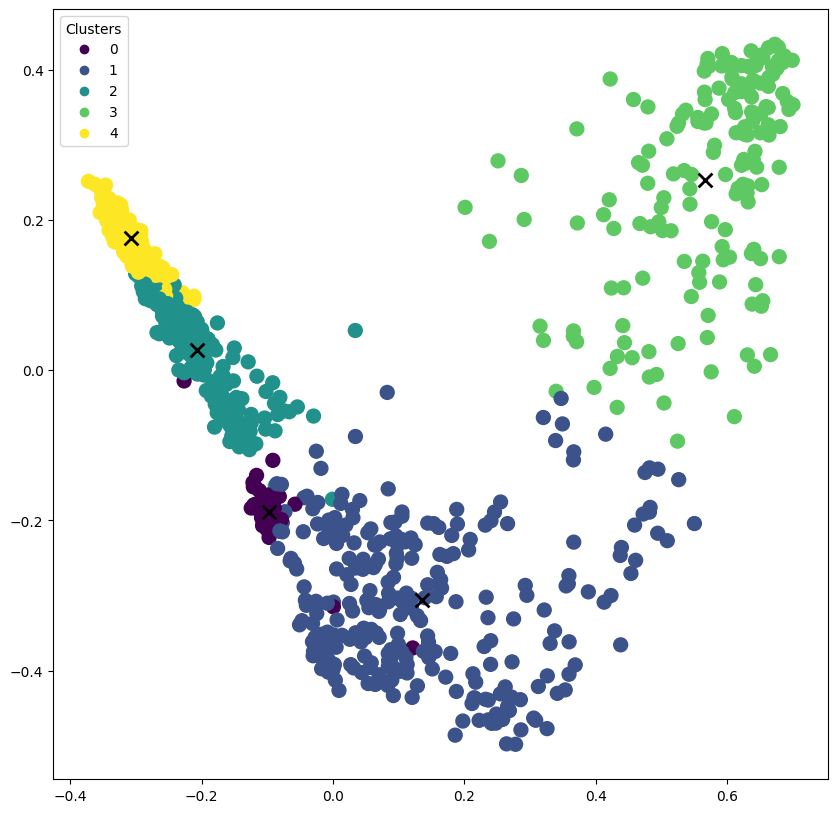

In [31]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")